### Descrição das colunas do dataset:

Rank: posição no ranking de vendas;

Name: nome do jogo;

Platform: plataforma em que o jogo foi liberado (PC, PS4, Xbox, etc.);

Year: ano de lançamento do game;

Genre: gênero do jogo;

Publisher: empresa que publicou o jogo;

NA_Sales: vendas na América do Norte (em milhões de dólares);

EU_Sales: vendas na Europa (em milhões de dólares);

JP_Sales: vendas no Japão (em milhões de dólares);

Other_Sales: vendas no restante do mundo (em milhões de dólares);

Global_Sales: total de vendas no mundo inteiro.

## Importação e limpeza de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Definição da paleta de cores
cores_hex = ['#e9c46a', '#f4a261', '#e76f51', '#2a9d8f', '#264652']
cores_sns = sns.color_palette(cores_hex)

In [2]:
dados = pd.read_csv(r"C:\Users\Pichau\Documents\GitHub\mercado-de-jogos\data\vgsales.csv")

In [3]:
dados.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Há 307 itens com dados faltantes nas colunas Year ou Publisher, estas linhas foram removidas da análise.

In [5]:
dados = dados.dropna()

O dataset não deve conter resultados a partir de 2016. Ao utilizar o query para filtrar estes dados, o dataset ficou com 15945 linhas.

In [6]:
dados = dados.query('Year <= 2016')

>>> 16.540 linhas -> 15.945 linhas após a limpeza dos dados

## Entendimento dos dados

Os dados podem ser divididos entre qualitativos e quatitativos.

Qualitativos: são os dados que se referem à qualificação ou qualidade de uma determinada coisa. Exemplo: sexo, estado civil, níveis, cor.

Quantitativos: são os dados que podem ser contados ou mensurados. Representam fatos concretos em forma de números e são estruturados em forma de estatísticas. Exemplo: altura, peso, quantidade de itens no estoque.

Colunas qualitativas: Name, Platform, Genre e Publisher.

Colunas quantitativas: Year, NA_Sales, EU_Sales, JP_Sales, Other_Sales e Global_Sales

In [7]:
# Análise dos valores únicos das colunas qualitativas nominais
# É inviável analisar os valores únicos da coluna Name, visto que retornaria milhares de valores
for coluna in dados.columns:
    if coluna in ['Platform', 'Genre', 'Publisher']:
        print(coluna)
        print(dados[coluna].unique())
    else:
        continue

Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']
Publisher
['Nintendo' 'Microsoft Game Studios' 'Take-Two Interactive'
 'Sony Computer Entertainment' 'Activision' 'Ubisoft' 'Bethesda Softworks'
 'Electronic Arts' 'Sega' 'SquareSoft' 'Atari' '505 Games' 'Capcom'
 'GT Interactive' 'Konami Digital Entertainment'
 'Sony Computer Entertainment Europe' 'Square Enix' 'LucasArts'
 'Virgin Interactive' 'Warner Bros. Interactive Entertainment'
 'Universal Interactive' 'Eidos Interactive' 'RedOctane' 'Vivendi Games'
 'Enix Corporation' 'Namco Bandai Games' 'Palcom' 'Hasbro Interactive'
 'THQ' 'Fox Interactive' 'Acclaim Entertainment' 'MTV Games'
 'Disney Interactive Studios' 'Majesco Entertainment' 'Codemasters'
 'Red O

In [8]:
# Analisando os dados quantitativos
dados_quant = dados[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
dados_quant.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000,16287.000000
mean,2006.402775,0.265695,0.147768,0.078849,0.048437,0.541022
std,5.830382,0.822525,0.509360,0.311916,0.190105,1.567520
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Porcentagem de títulos lançados para cada plataforma

In [9]:
frequencia = dados['Platform'].value_counts(ascending = True)
porcentagem = dados['Platform'].value_counts(normalize = True) * 100

plataformas = pd.DataFrame({'Lançamentos por plataforma': frequencia, 'Porcentagem (%)': round(porcentagem, 2)})
plataformas = plataformas.sort_values(by='Porcentagem (%)', ascending=False)
plataformas

,Lançamentos por plataforma,Porcentagem (%)
Platform,,
DS,2130,13.08
PS2,2127,13.06
PS3,1304,8.01
Wii,1290,7.92
X360,1234,7.58
PSP,1197,7.35
PS,1189,7.30
PC,938,5.76
XB,803,4.93


Porcentagem de títulos lançados por ano

In [10]:
frequencia = dados['Year'].value_counts(ascending = True)
porcentagem = dados['Year'].value_counts(normalize = True) * 100

plataformas = pd.DataFrame({'Lançamentos por ano': frequencia, 'Porcentagem (%)': round(porcentagem, 2)})
plataformas

,Lançamentos por ano,Porcentagem (%)
Year,,
1980.0,9,0.06
1981.0,46,0.28
1982.0,36,0.22
1983.0,17,0.10
1984.0,14,0.09
1985.0,14,0.09
1986.0,21,0.13
1987.0,16,0.10
1988.0,15,0.09


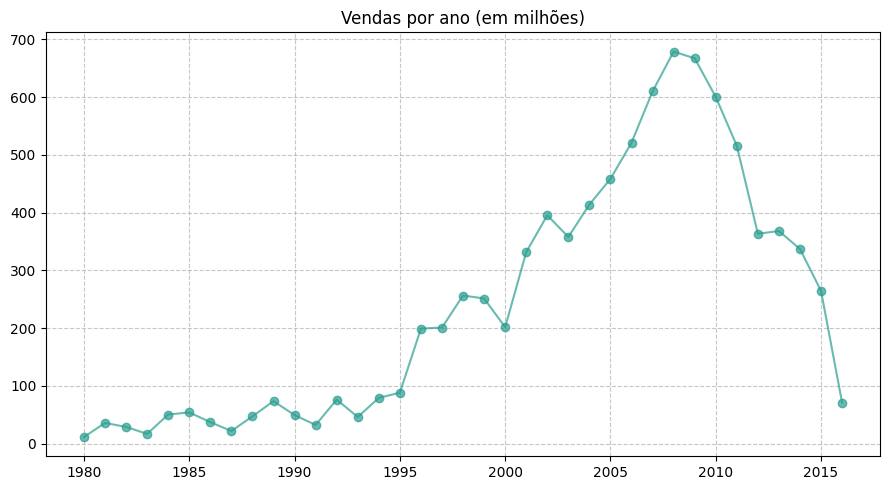

In [33]:
vendas_ano = dados.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(9, 5))
plt.plot(vendas_ano.index, vendas_ano.values, marker='o', linestyle='-', alpha=0.7, color=cores_hex[3], label='Vendas Globais')
plt.title('Vendas por ano (em milhões)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vendas por gênero

In [12]:
dados['Genre'].value_counts()

Genre
Action          3250
Sports          2304
Misc            1686
Role-Playing    1468
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       847
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

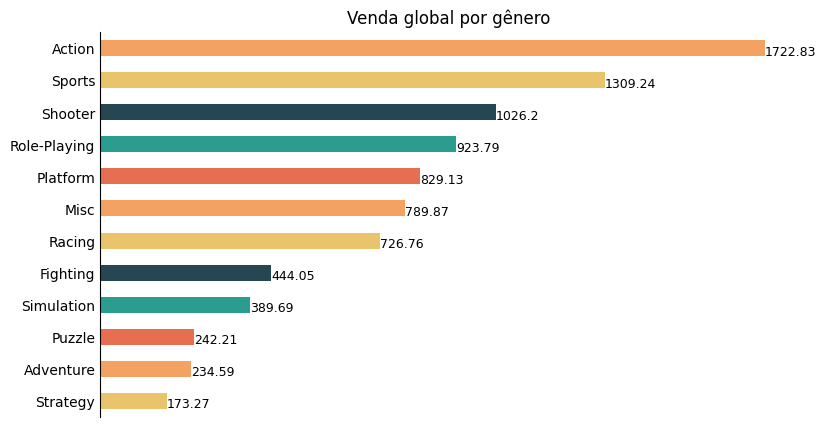

In [35]:
vendas_genero = dados.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(9, 5))
grafico = vendas_genero.sort_values().plot(kind='barh', color=cores_hex)
grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.get_xaxis().tick_bottom()
grafico.get_yaxis().tick_left()
plt.tick_params(axis='both', which='both', length=0)

for i, v in enumerate(vendas_genero.sort_values()):
    plt.text(v + 0.1, i - 0.1, str(round(v, 2)), color='black', va='center', fontsize=9)

plt.title('Venda global por gênero')
plt.xticks([])
plt.ylabel('')
plt.show()

Top jogos por regiões

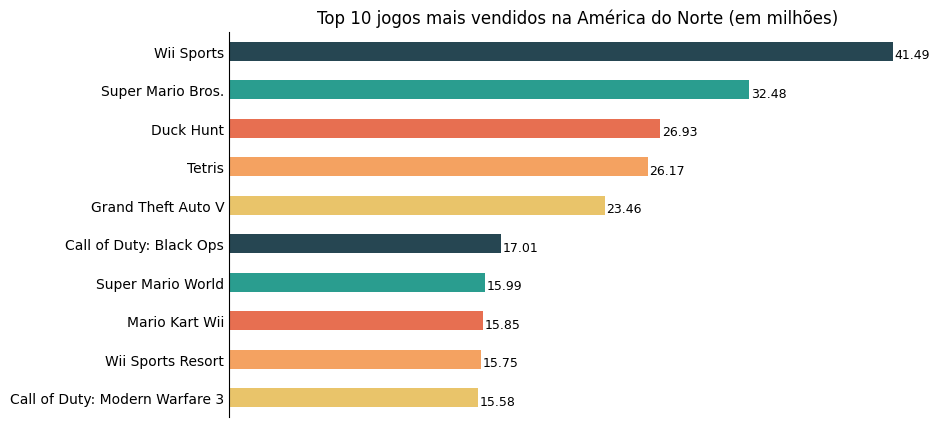

In [36]:
vendas = dados.groupby('Name')['NA_Sales'].sum()
vendas = vendas.sort_values(ascending=False)
jogos_na = vendas.head(10)[::-1]

plt.figure(figsize=(9, 5))
grafico = jogos_na.plot(kind='barh', color=cores_hex)
grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.get_xaxis().tick_bottom()
grafico.get_yaxis().tick_left()
plt.tick_params(axis='both', which='both', length=0)

for i, v in enumerate(jogos_na):
    plt.text(v + 0.1, i - 0.1, str(round(v, 2)), color='black', va='center', fontsize=9)

plt.title('Top 10 jogos mais vendidos na América do Norte (em milhões)')
plt.xticks([])
plt.ylabel('')
plt.show()

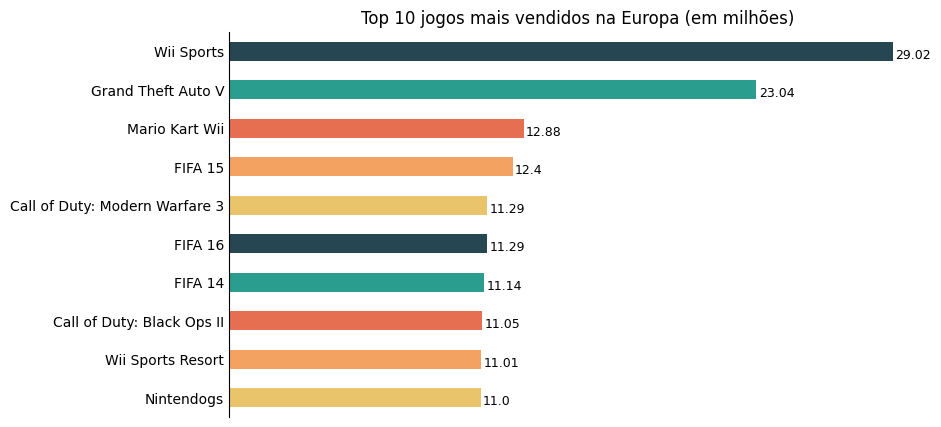

In [39]:
vendas = dados.groupby('Name')['EU_Sales'].sum()
vendas = vendas.sort_values(ascending=False)
jogos_eu = vendas.head(10)[::-1]

plt.figure(figsize=(9, 5))
grafico = jogos_eu.plot(kind='barh', color=cores_hex)
grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.get_xaxis().tick_bottom()
grafico.get_yaxis().tick_left()
plt.tick_params(axis='both', which='both', length=0)

for i, v in enumerate(jogos_eu):
    plt.text(v + 0.1, i - 0.1, str(round(v, 2)), color='black', va='center', fontsize=9)

plt.title('Top 10 jogos mais vendidos na Europa (em milhões)')
plt.xticks([])
plt.ylabel('')
plt.show()

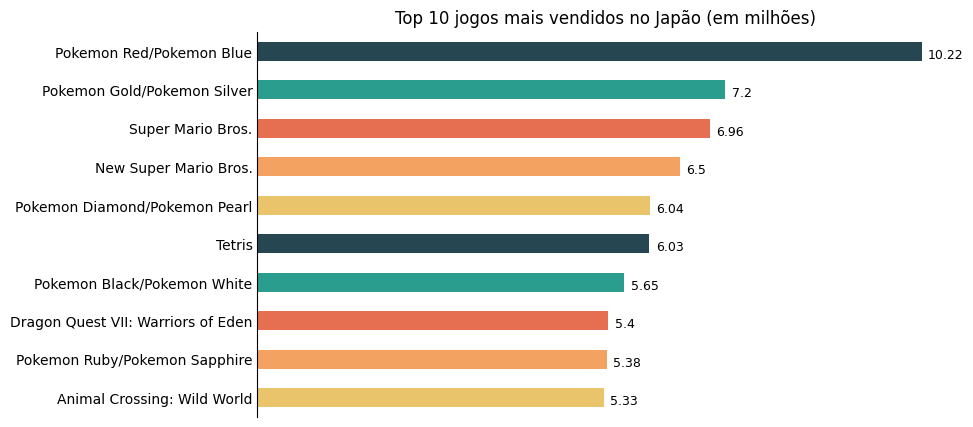

In [42]:
vendas = dados.groupby('Name')['JP_Sales'].sum()
vendas = vendas.sort_values(ascending=False)
jogos_jp = vendas.head(10)[::-1]

plt.figure(figsize=(9, 5))
grafico = jogos_jp.plot(kind='barh', color=cores_hex)
grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.get_xaxis().tick_bottom()
grafico.get_yaxis().tick_left()
plt.tick_params(axis='both', which='both', length=0)

for i, v in enumerate(jogos_jp):
    plt.text(v + 0.1, i - 0.1, str(round(v, 2)), color='black', va='center', fontsize=9)

plt.title('Top 10 jogos mais vendidos no Japão (em milhões)')
plt.xticks([])
plt.ylabel('')
plt.show()

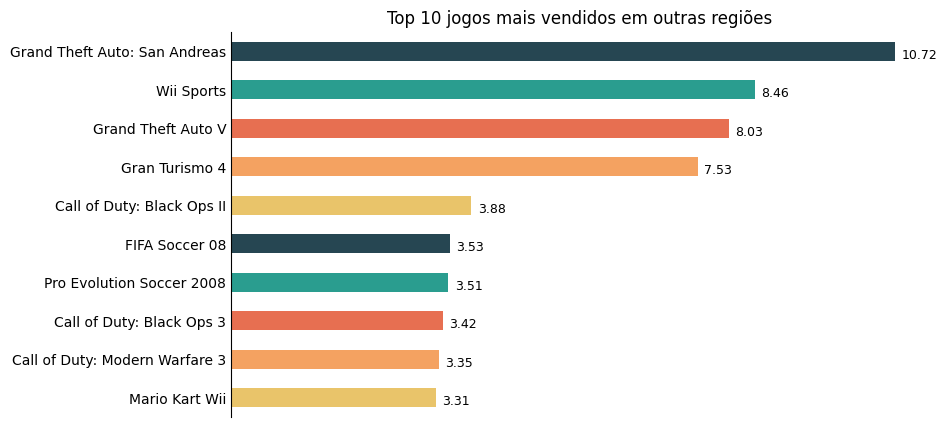

In [30]:
vendas = dados.groupby('Name')['Other_Sales'].sum()
vendas = vendas.sort_values(ascending=False)
jogos_ot = vendas.head(10)[::-1]

plt.figure(figsize=(9, 5))
grafico = jogos_ot.plot(kind='barh', color=cores_hex)

grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.get_xaxis().tick_bottom()
grafico.get_yaxis().tick_left()
plt.tick_params(axis='both', which='both', length=0)

for i, v in enumerate(jogos_ot):
    plt.text(v + 0.1, i - 0.1, str(round(v, 2)), color='black', va='center', fontsize=9)

plt.title('Top 10 jogos mais vendidos em outras regiões')
plt.xticks([])
plt.ylabel('')

plt.show()

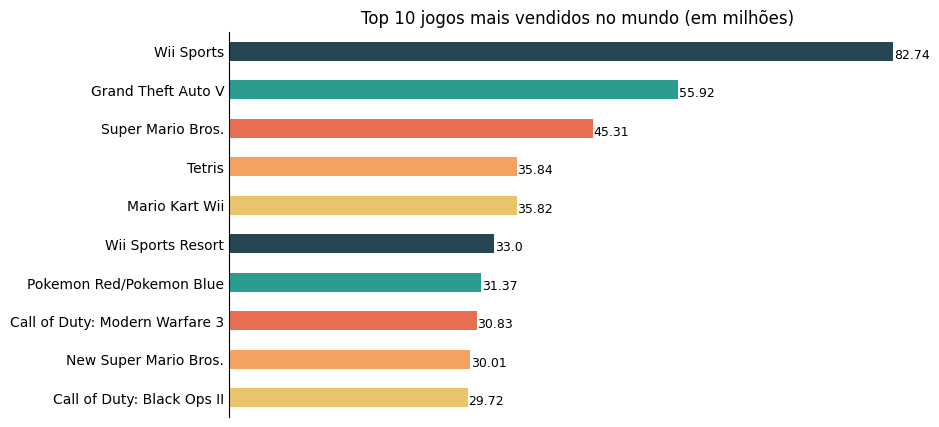

In [31]:
vendas = dados.groupby('Name')['Global_Sales'].sum()
vendas = vendas.sort_values(ascending=False)
jogos_gl = vendas.head(10)[::-1]

plt.figure(figsize=(9, 5))
grafico = jogos_gl.plot(kind='barh', color=cores_hex)
grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.get_xaxis().tick_bottom()
grafico.get_yaxis().tick_left()
plt.tick_params(axis='both', which='both', length=0)

for i, v in enumerate(jogos_gl):
    plt.text(v + 0.1, i - 0.1, str(round(v, 2)), color='black', va='center', fontsize=9)

plt.title('Top 10 jogos mais vendidos no mundo (em milhões)')
plt.xticks([])
plt.ylabel('')
plt.show()

In [19]:
# Venda de jogos por Publisher
vendas_publisher = dados.groupby('Publisher')['Global_Sales'].sum()
vendas_publisher = vendas_publisher.sort_values(ascending=False)
ranking_publisher = vendas_publisher.head(10)

tabela_ranking_publisher = pd.DataFrame({
    'Publisher': ranking_publisher.index,
    'Total de vendas (em milhões)': ranking_publisher.values})
print(tabela_ranking_publisher)

                      Publisher  Total de vendas (em milhões)
0                      Nintendo                       1784.43
1               Electronic Arts                       1093.39
2                    Activision                        721.41
3   Sony Computer Entertainment                        607.28
4                       Ubisoft                        473.25
5          Take-Two Interactive                        399.30
6                           THQ                        340.44
7  Konami Digital Entertainment                        278.56
8                          Sega                        270.66
9            Namco Bandai Games                        253.65


Venda de jogos por plataforma

In [20]:
vendas_platform = dados.groupby('Platform')['Global_Sales'].sum()
vendas_platform = vendas_platform.sort_values(ascending=False)
ranking_platform = vendas_platform.head(10)

tabela_ranking_platform = pd.DataFrame({
    'Platform': ranking_platform.index,
    'Total de vendas (em milhões)': ranking_platform.values})
print(tabela_ranking_platform)

  Platform  Total de vendas (em milhões)
0      PS2                       1233.46
1     X360                        969.60
2      PS3                        949.35
3      Wii                        909.81
4       DS                        818.62
5       PS                        727.39
6      GBA                        305.62
7      PSP                        291.71
8      PS4                        278.07
9       PC                        254.70


Vendas totais

In [21]:
somas = dados[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
tabela_somas = pd.DataFrame({
    'Região': ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
    'Total de Vendas (em milhões)': somas.values})

print(tabela_somas)

         Região  Total de Vendas (em milhões)
0      NA_Sales                       4327.38
1      EU_Sales                       2406.69
2      JP_Sales                       1284.22
3   Other_Sales                        788.89
4  Global_Sales                       8811.63


Heatmap das vendas x região

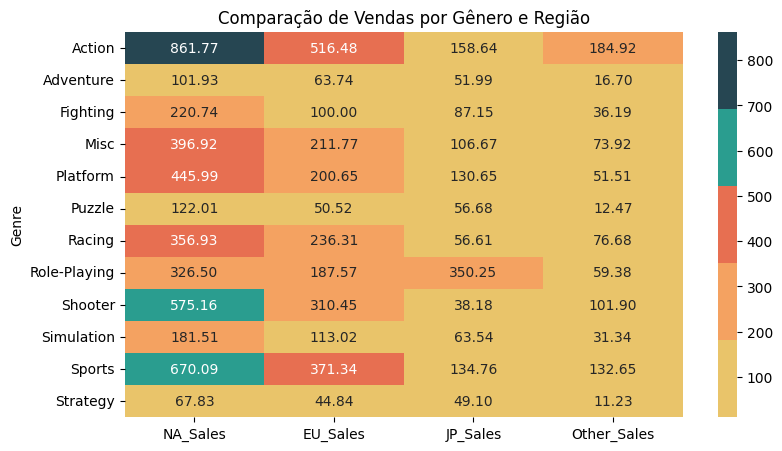

In [32]:
colunas = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
dados_pivot = dados.pivot_table(index='Genre', values=colunas, aggfunc='sum')
dados_pivot = dados_pivot[colunas]

plt.figure(figsize=(9, 5))
sns.heatmap(dados_pivot, annot=True, fmt=".2f", cmap=cores_sns)
plt.title('Comparação de Vendas por Gênero e Região')
plt.show()